In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns

In [21]:
df=pd.read_csv("titanic.csv",sep=";")

In [22]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,Allen. Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,St Louis. MO
1,1,1,Allison. Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,Montreal. PQ / Chesterville. ON
2,1,0,Allison. Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON
3,1,0,Allison. Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,Montreal. PQ / Chesterville. ON
4,1,0,Allison. Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,Zabour. Miss. Hileni,female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,Zabour. Miss. Thamine,female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,Zakarian. Mr. Mapriededer,male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,Zakarian. Mr. Ortin,male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [23]:
df.sex.replace({"female":0,"male":1},inplace=True)

C:\Users\marwane.boukili\AppData\Local\Temp\ipykernel_17080\3336334005.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.sex.replace({"female":0,"male":1},inplace=True)
C:\Users\marwane.boukili\AppData\Local\Temp\ipykernel_17080\3336334005.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.

In [24]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,Allen. Miss. Elisabeth Walton,0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,St Louis. MO
1,1,1,Allison. Master. Hudson Trevor,1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,Montreal. PQ / Chesterville. ON
2,1,0,Allison. Miss. Helen Loraine,0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON
3,1,0,Allison. Mr. Hudson Joshua Creighton,1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,Montreal. PQ / Chesterville. ON
4,1,0,Allison. Mrs. Hudson J C (Bessie Waldo Daniels),0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,Zabour. Miss. Hileni,0,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,Zabour. Miss. Thamine,0,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,Zakarian. Mr. Mapriededer,1,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,Zakarian. Mr. Ortin,1,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [8]:
df.age = df.age.fillna(df.age.mean())

In [25]:
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [46]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [26]:
df = df[['pclass', 'survived', 'sex', 'age']]

In [27]:
df.isna().sum()

pclass        0
survived      0
sex           0
age         263
dtype: int64

In [28]:
# On remplace les valeurs manquantes par les valeurs le plsu frequentes 
imputer = SimpleImputer(strategy="most_frequent")
df["age"] = imputer.fit_transform(df[["age"]])

C:\Users\marwane.boukili\AppData\Local\Temp\ipykernel_17080\2916115957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"] = imputer.fit_transform(df[["age"]])


In [33]:
# Définition des caractéristiques et de la variable cible
X = df.drop("survived", axis=1)
y = df["survived"]

X

,pclass,sex,age
0,1,0,29.0000
1,1,1,0.9167
2,1,0,2.0000
3,1,1,30.0000
4,1,0,25.0000
...,...,...,...
1304,3,0,14.5000
1305,3,0,24.0000
1306,3,1,26.5000
1307,3,1,27.0000


In [36]:
# Encodage des variables catégoriques
df = pd.get_dummies(df, columns=["sex"], drop_first=True)

KeyError: "None of [Index(['sex'], dtype='object')] are in the [columns]"

In [39]:
# Standardisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.54609786, -1.34499549,  0.02295154],
       [-1.54609786,  0.74349692, -2.12210557],
       [-1.54609786, -1.34499549, -2.03936101],
       ...,
       [ 0.84191642,  0.74349692, -0.16800333],
       [ 0.84191642,  0.74349692, -0.12981235],
       [ 0.84191642,  0.74349692,  0.02295154]], shape=(1309, 3))

In [40]:
# Division des données en ensembles d'entraînement et de test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Création et entraînement du modèle
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [43]:
# Prédictions
y_pred = model.predict(X_test)

In [47]:
# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.77

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.89      0.81       144
           1       0.82      0.64      0.72       118

    accuracy                           0.77       262
   macro avg       0.79      0.76      0.77       262
weighted avg       0.78      0.77      0.77       262


Confusion Matrix:
 [[128  16]
 [ 43  75]]


array([[128,  16],
       [ 43,  75]])

<Axes: >

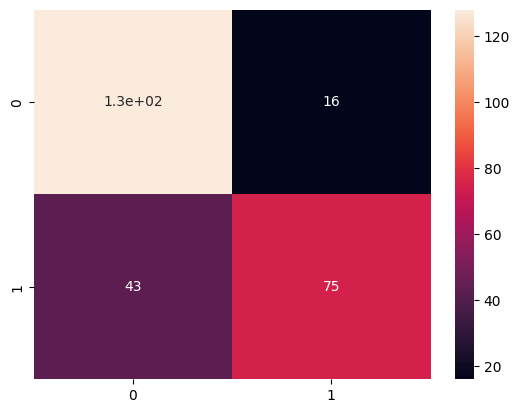

In [48]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)